We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

Q:  a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

rng = np.random.default_rng (5)
X1 = rng.uniform(size =500) - 0.5
X2 = rng.uniform(size =500) - 0.5
y = X1**2 - X2**2 > 0

Q: Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the y-
axis.

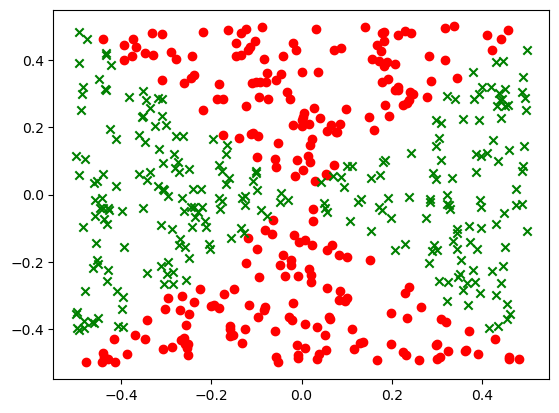

In [16]:
class_0 = np.where(y == False)
class_1 = np.where(y == True)

plt.scatter(X1[class_0], X2[class_0], c="r", marker="o")
plt.scatter(X1[class_1], X2[class_1], c="g", marker="x")

Q: Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [46]:
X = np.column_stack((X1, X2))

model = LogisticRegression()
model.fit(X,y)

model.coef_

array([[-0.15151916,  0.08178592]])

Q:Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear.

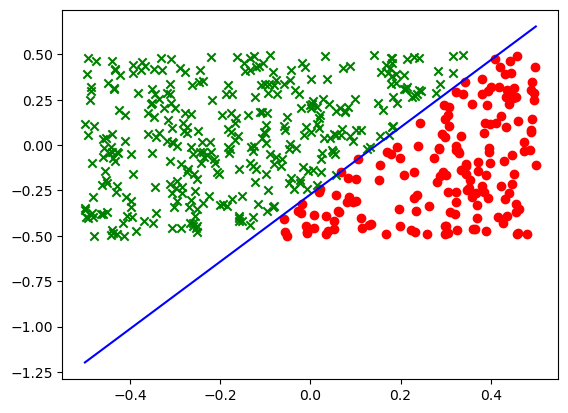

In [41]:
predicted_labels = model.predict(X)

plt.scatter(X1[predicted_labels == 0], X2[predicted_labels == 0], c="r", marker="o")
plt.scatter(X1[predicted_labels == 1], X2[predicted_labels == 1], c="g", marker="x")

coef = model.coef_
intercept = model.intercept_
x_values = np.linspace(-0.5, 0.5, 100)
y_values = -(coef[0, 0] * x_values + intercept) / coef[0, 1]
plt.plot(x_values, y_values, c="b")

Q: Now fit a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. X2
1 , X1 ×X2, log(X2),
and so forth)

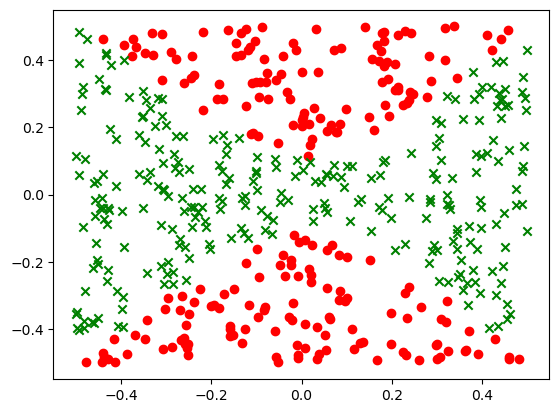

In [42]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)

model = LogisticRegression()
model.fit(X_poly, y)

predicted_labels = model.predict(X_poly)

plt.scatter(X1[predicted_labels == 0], X2[predicted_labels == 0], c="r", marker="o")
plt.scatter(X1[predicted_labels == 1], X2[predicted_labels == 1], c="g", marker="x")


Q: Fit a support vector classifier to the data with X1 and X2 as
predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted
class labels

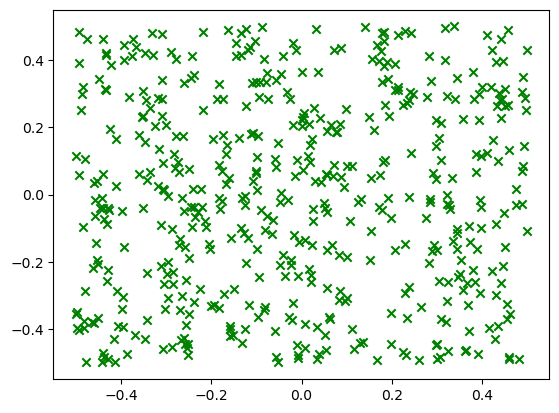

In [47]:
model = SVC(kernel='linear')
model.fit(X, y)

predicted_labels = model.predict(X)

plt.scatter(X1[predicted_labels == 0], X2[predicted_labels == 0], c="r", marker="o")
plt.scatter(X1[predicted_labels == 1], X2[predicted_labels == 1], c="g", marker="x")

Q: Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels

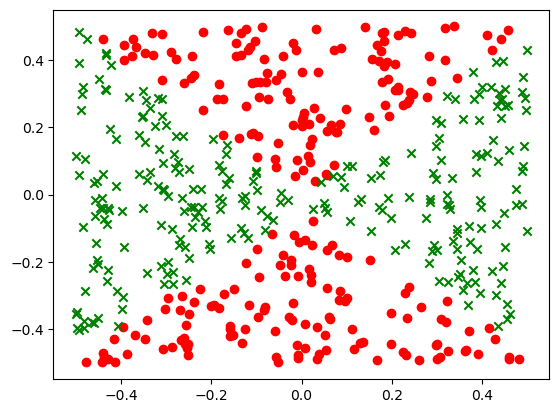

In [48]:
model = SVC(kernel='rbf')  

model.fit(X, y)

predicted_labels = model.predict(X)

plt.scatter(X1[predicted_labels == 0], X2[predicted_labels == 0], c="r", marker="o")
plt.scatter(X1[predicted_labels == 1], X2[predicted_labels == 1], c="g", marker="x")